<hr style="height:10px"> 
 
<div class='container2'>
		<div>
			<img src='images\tesla_logo.svg' ALIGN='left' style='width:5em'>
		</div>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Preço de Ações Tesla - (2000-2025)</h1>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial - Análise Exploratória de Dados </b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2><a href="https://www.kaggle.com/datasets/taimoor888/tesla-stock-price-data-2000-2025">Tesla Stock Price Dataset </a> </h2>

Notebook desenvolvido por: <a href="https://luc4sdev.vercel.app/">Lucas Pereira França</a>

 <hr style="height:2px"> 

In [2]:
# Confirmar a versão da Linguagem Python instalada
from platform import python_version
print(f'A versão da linguagem Python usada neste projeto é a {python_version()}!')

A versão da linguagem Python usada neste projeto é a 3.12.7!


In [3]:
# Verificar se o Python está funcionando
print('Bye bye, World!')

Bye bye, World!


---
## 2. Carregar e Exibir os Dados da Fonte

Primeiro, vamos importar todas as bibliotecas que serão utilizadas no projeto.

In [5]:
# -*- coding: utf-8 -*-

# importar a biblioteca usada para trabalhar com vetores e matrizes
import numpy as np

# importar a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import pandas as pd 

# importar as bibliotecas usadas para geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


### Apresentação da base de dados

Este conjunto de dados contém os preços históricos das ações da Tesla Inc. (TSLA) de 1º de janeiro de 2000 a março de 2025. Os dados incluem preços diários de abertura, alta, baixa, fechamento, preços de fechamento ajustados e volume de negociação. É ideal para análise do mercado de ações, previsão de séries temporais e pesquisa financeira.


In [9]:
# importar o arquivo e guardar em um dataframe do Pandas
df_dataset = pd.read_csv ( 'datasets/tesla_stock_data_2000_2025.csv', sep=',', skiprows=2, header=None, names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], index_col=None)
df_dataset = df_dataset.drop(0)  # Remove a linha com índice 0
print('Dados importados com sucesso!')

Dados importados com sucesso!


In [10]:
# exibir uma amostra do dataframe
#display(df_dataset.head())
display(df_dataset)

,Date,Close,High,Low,Open,Volume
1,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500.0
2,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500.0
3,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000.0
4,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000.0
5,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500.0
...,...,...,...,...,...,...
3688,2025-02-25,302.799988,328.890015,297.250000,327.019989,134228800.0
3689,2025-02-26,290.799988,309.000000,288.040009,303.709991,100118300.0
3690,2025-02-27,281.950012,297.230011,280.880005,291.160004,101748200.0
3691,2025-02-28,292.980011,293.880005,273.600006,279.500000,115397200.0


---
## 3. Pré-processamento

Minimizar ou eliminar problemas existentes em um conjunto de dados, bem como torná-los mais adequados para sua utilização por um determinado algoritmo de aprendizagem de máquina.

## 3.1 Eliminação de atributos irrelevantes

O objetivo do projeto é identificar o preço das ações da Tesla ao longo dos anos. Não é preciso uma análise profunda para observar que os atributos `High` e `Low` não contribuem muito para a identificação. Portanto, em uma tarefa de aprendizado de máquina, devemos remover esses atributos, pois são irrelevantes. 

*Em cenários reais, muitas vezes é necessário consultar especialistas para ajudar a identificar quais atributos são irrelevantes.*# exibir uma amostra do dataframe
#display(df_dataset.head())
display(df_dataset)

In [12]:
# remover as colunas id_planta e cidade_origem
df_dataset = df_dataset.drop(columns=['High','Low'])

# imprimir o dataframe
display(df_dataset.head(n=20))

,Date,Close,Open,Volume
1,2010-06-29,1.592667,1.266667,281494500.0
2,2010-06-30,1.588667,1.719333,257806500.0
3,2010-07-01,1.464000,1.666667,123282000.0
4,2010-07-02,1.280000,1.533333,77097000.0
5,2010-07-06,1.074000,1.333333,103003500.0
6,2010-07-07,1.053333,1.093333,103825500.0
7,2010-07-08,1.164000,1.076000,115671000.0
8,2010-07-09,1.160000,1.172000,60759000.0
9,2010-07-12,1.136667,1.196667,33037500.0
10,2010-07-13,1.209333,1.159333,40201500.0


---
## 3.2 Tratamento de atributos com valores ausentes

Verificar se existem atributos com valores ausentes (NaN) na base de dados.

In [14]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df_dataset).any(axis=1).to_numpy().nonzero()

# imprime apenas as linhas com valores ausentes
display(df_dataset.iloc[idxRowNan])

,Date,Close,Open,Volume


In [15]:
def trataFaltantes( df_dataset ):
    
    notNull_cl = df_dataset.loc[ ~pd.isnull(df_dataset['Close']), :]
    notNull_op = df_dataset.loc[ ~pd.isnull(df_dataset['Open']), :]
    notNull_vol = df_dataset.loc[ ~pd.isnull(df_dataset['Volume']), :]

    media_cl = notNull_cl['Close'].mean()
    media_op = notNull_op['Open'].mean()
    media_vol = notNull_vol['Volume'].mean()

    # substitui os valores nulos pela média
    df_dataset.loc[ pd.isnull(df_dataset['Close']), 'Close'] = media_cl
    # substitui os valores nulos pela média
    df_dataset.loc[ pd.isnull(df_dataset['Open']), 'Open'] = media_op
    df_dataset.loc[ pd.isnull(df_dataset['Volume']), 'Volume'] = media_vol
    
    return df_dataset

trataFaltantes( df_dataset )
    
# imprime apenas as linhas que antes possuíam valores NaN
print('\nObjeto(s) com valor(es) nulo(s):')
display(df_dataset.iloc[idxRowNan])


Objeto(s) com valor(es) nulo(s):


,Date,Close,Open,Volume


## 3.3 Tratamento de dados inconsistentes ou redundantes

Verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há registros representados por atributos com todos os valores iguais, mas com diagnóstico diferentes. A redundância é dada pela repetição de linhas na base de dados.

In [17]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Date','Open','Close','Volume'],keep=False)] 

# se houver valores redundantes ou inconsistentes, imprima 
if len(df_duplicates) > 0:
    print('\nObjeto(s) redundante(s) e/ou inconsistente(s):')
    display(df_duplicates)
else:
    print('Não existem objetos redundantes e/ou inconsistentes!')

Não existem objetos redundantes e/ou inconsistentes!


Se existirem objetos redundantes (duplicados) e outros inconsistentes (iguais, exceto diagnóstico distintos). 

Primeiro, serão removidos os registros redundantes, mantendo na base apenas o primeiro deles.

In [22]:
def delDuplicatas( df_dataset ):
    
    # remove o(s) objeto(s) duplicado(s), mantendo apenas a primeira ocorrência
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

df_dataset = delDuplicatas( df_dataset )

Após remover os objetos redundantes, é preciso checar se há registros inconsistentes.

In [29]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Date','Open','Close','Volume'],keep=False)] 

# se existir objetos inconsistentes, exibir
if len(df_duplicates)>0:
    print('\nObjeto(s) inconsistente(s):')
    display(df_duplicates)
else:
    print('Não existem objetos redundantes e/ou inconsistentes!')
    

Não existem objetos redundantes e/ou inconsistentes!


In [31]:
display(df_dataset.tail())

,Date,Close,Open,Volume
3688,2025-02-25,302.799988,327.019989,134228800.0
3689,2025-02-26,290.799988,303.709991,100118300.0
3690,2025-02-27,281.950012,291.160004,101748200.0
3691,2025-02-28,292.980011,279.500000,115397200.0
3692,2025-03-03,302.339996,300.367004,52912315.0


---
## 4 Análise dos Dados

A análise das características presentes em um conjunto de dados permite a descoberta de padrões e tendências que podem fornecer informações valiosas para compreender o processo que gerou os dados.

In [34]:
# apresenta as principais estatísticas da base de dados para atributos numéricos
df_detalhes = df_dataset.describe()

display(df_detalhes)

,Close,Open,Volume
count,3692.000000,3692.000000,3.692000e+03
mean,84.684063,84.724803,9.647972e+07
std,111.289879,111.413059,7.736170e+07
min,1.053333,1.076000,1.777500e+06
25%,12.226501,12.238833,4.938900e+07
50%,18.326334,18.325000,8.192955e+07
75%,182.869999,182.982506,1.216402e+08
max,479.859985,475.899994,9.140820e+08


---
## 4.1 Detecção de outliers (valor atípico)

Outro passo importante na análise e tratamento dos dados é a detecção de outliers (dados gerados por leituras incorretas, erros de digitação etc).

Gráfico Box Plot

Uma das maneiras mais simples de verificar se os dados contém outliers.

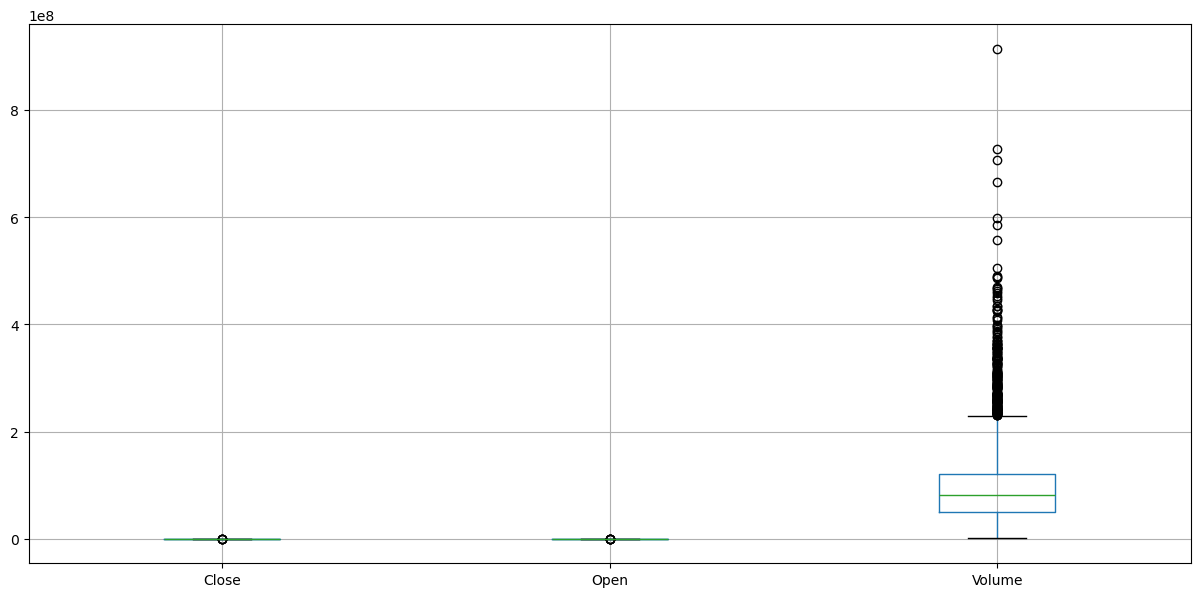

In [37]:
# gerar um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.show()

O box plot está indicando que o atributo volume possui outliers, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois tratam-se de objetos com valores de atributos incorretos.

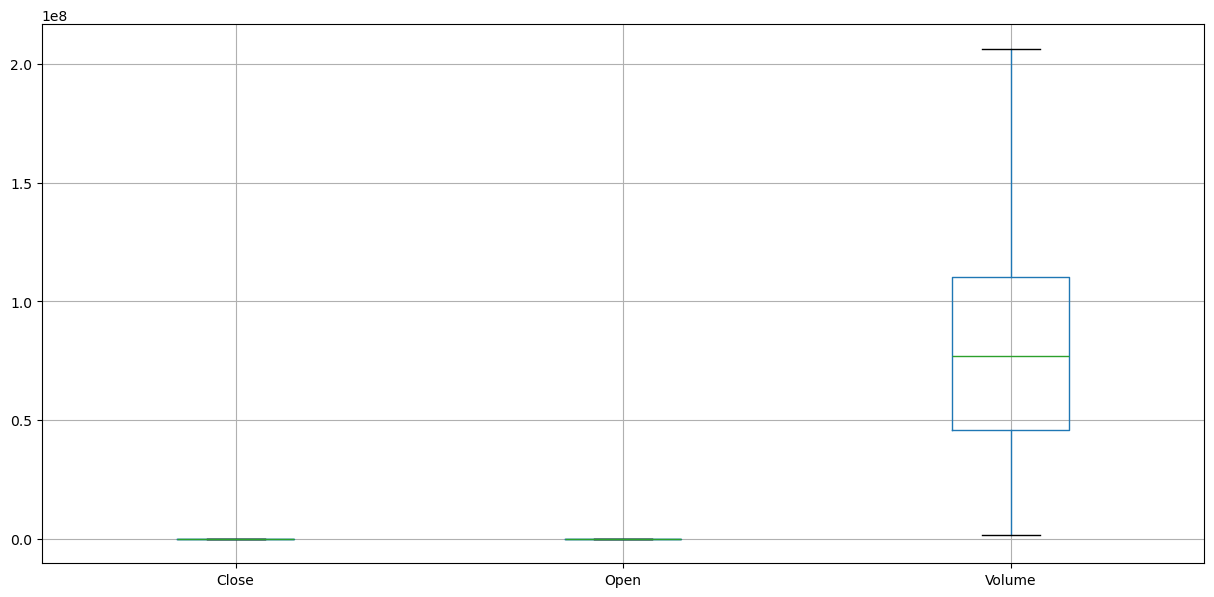

In [44]:
def removeOutliers(df):
    """
    Remove os outliers da base de dados (apenas para colunas numéricas)
    """
    # Faz uma cópia do dataframe para não alterar o original
    df_clean = df.copy()
    
    for atributo in df_clean.columns:
        # Verifica se a coluna é numérica
        if pd.api.types.is_numeric_dtype(df_clean[atributo]):
            # Remove valores infinitos primeiro
            df_clean[atributo] = df_clean[atributo].replace([np.inf, -np.inf], np.nan)
            
            # Calcula quartis apenas para valores finitos
            q75, q25 = np.percentile(df_clean[atributo].values, [75, 25])
            IQR = q75 - q25

            # Filtra os outliers
            df_clean = df_clean[ (df_clean[atributo]<=(q75+1.5*IQR)) & (df_clean[atributo]>=(q25-1.5*IQR)) ]
    
    return df_clean


# Converta colunas para numérico se necessário (exceto datas)
numeric_cols = ['Open', 'Close', 'Volume']
for col in numeric_cols:
    if col in df_dataset.columns:
        df_dataset[col] = pd.to_numeric(df_dataset[col], errors='coerce')

# Agora remova os outliers
df_dataset = removeOutliers(df_dataset)

# Visualize os resultados
df_dataset.boxplot(figsize=(15,7))
plt.show()

Depois da remoção, o box plot e os gráficos de dispersão indicam que não há mais nenhum outlier na base de dados.

Gráfico para verificar o preço das ações ao longo dos anos

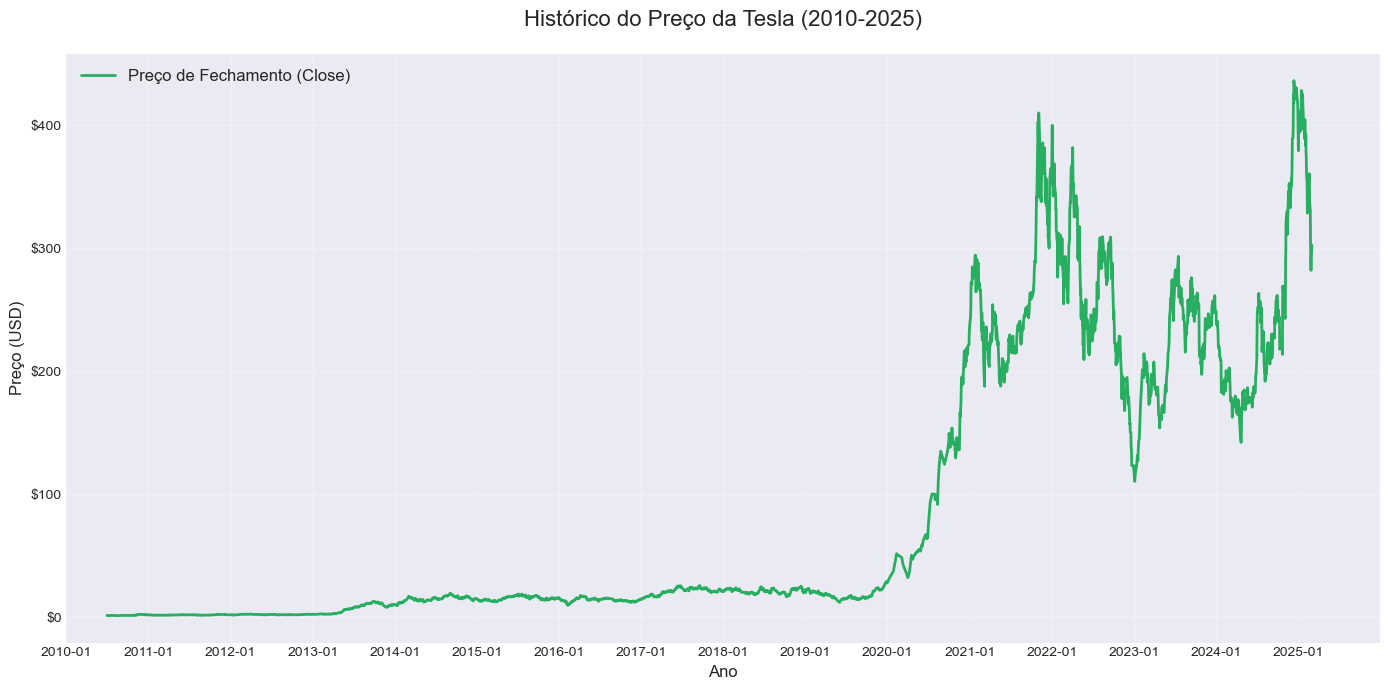

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# 1. Converter a coluna de datas para datetime
df_dataset['Date'] = pd.to_datetime(df_dataset['Date'], format='%Y-%m-%d')

# 2. Ordenar por data
df_dataset = df_dataset.sort_values('Date')

# 3. Configuração do gráfico
fig, ax = plt.subplots(figsize=(14, 7))

# 4. Plot do preço de fechamento
ax.plot(df_dataset['Date'], 
        df_dataset['Close'], 
        color='#27ae60', 
        linewidth=2,
        label='Preço de Fechamento (Close)')

# 5. Configuração do eixo X (datas)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.YearLocator())  # Marcador anual
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Marcador mensal

# 6. Definir limites do eixo X
ax.set_xlim(pd.to_datetime(['2010-01-01', '2025-12-31']))

# 7. Configuração do eixo Y (formato monetário)
def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

ax.set_title('Histórico do Preço da Tesla (2010-2025)', fontsize=16, pad=20)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Preço (USD)', fontsize=12)
ax.legend(fontsize=12)


plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()